In [1]:
#PHYS 213
#Assignment 8
#Anne Xie
#Student Number: 20125978

In [2]:
#Question 1

import numpy as np
import random as rand
import matplotlib.pyplot as plt


def walk(prob):
    total = 0 #Initally zero students make it home
    for i in range(1000): #for each 1000 students
        
        step = (1-prob)/2 #Find the probability of taking a step
        position = [] #Make a list to hold the steps
        position.append(0) #Start walk at 0

        for j in range (1000): #Each student takes 1000 steps
            number = rand.random() #Given a random number as the step
            if position[-1] >= 50: #If the student walks forward by 50 steps
                total += 1 #They make it home
                break
            elif number <= prob: #Probability that the student naps
                position.append(position[-1]) #Then the student does not move
            elif number >= step + prob: 
                position.append(position[-1]+1) #Student moves one step forward
            else:
                position.append(position[-1]-1) #Otherwise student steps backwards
    return total, position #return the number of students that make it home and their path
        
total, position = walk(0.05)
total2, position2 = walk(0.01)

print ("There are",total, "students that make it home.")
plt.plot(position)
print ("There are",total2, "students that make it home.")
plt.plot(position2)
plt.xlabel("steps")
plt.ylabel("position")

There are 106 students that make it home.
There are 100 students that make it home.


Text(0, 0.5, 'position')

238.99007155083066


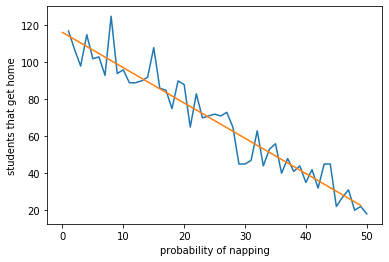

In [35]:
#Question 2

import scipy.optimize as opt

students = [] 
paths = []
x = np.arange(1,51,1)

for i in np.arange(0.01,0.51,0.01): #loop through the probability of napping
    student, path = walk(i) #return data run through walk function
    students.append(student) #append to lists
    paths.append(path)

plt.plot(x, students) #plot students that make it home vs probibility of napping

def linearFit(x,*p): #guess a linear fit
    return p[0] + p[1]*x

#fit to the graph
fitParameters, fitCovariance = opt.curve_fit(linearFit, x, students, p0 = (120,-24))#guesses might change depending on the graph..
xfit = np.arange(0,50,1) #x range
yfit = fitParameters[0] + fitParameters[1]*xfit 
plt.plot(xfit,yfit)
plt.xlabel("probability of napping")
plt.ylabel("students that get home")

#find chi square
for point in range(len(x)): #loop through all x values
    fitDiff = (students[point]-yfit[point])**2/(0.3)**2 #find chi-squared value for each point
chiSquared = np.sum(fitDiff) #sum up all values
print (chiSquared)

The mean money after 100 games for a player betting on red is 860.5
The mean money after 100 games for a player betting on green is -3725.9
The mean money after 100 games for a player betting on black is 863.0


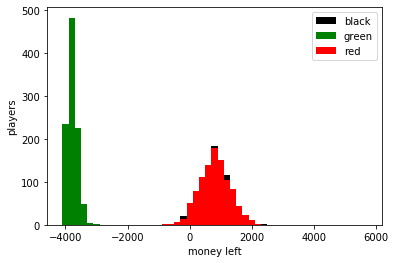

In [57]:
#Question 3

def roulette(games,colour,total,bet):
    #define a list of numbers to each colour
    if colour == "red":
        colour = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18] 
    elif colour == "black":
        colour = [19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]
    elif colour == "green":
        colour = [37]
        
    bag = []
    
    for player in range(1000): #looping through 1000 players
        money = total #start off with the same amount for each player
        for i in range(games): #for each game played
            number = rand.randrange(1,38,1) #generate a random number
            if number in colour: #if that number is in the colour
                money = money + bet #add bet to total money
            else: #otherwise
                money = money - bet #subtract bet from total money
        bag.append(money) 
        
    mean = sum(bag)/1000 #find mean of money left after 100 games for one player
    return bag, mean #return after all games

#calling function to run game betting on different colours
green, gMean = roulette(100,"green",1000,50)
red, rMean = roulette(100,"red",1000,50)
black, bMean = roulette(100,"black",1000,50)

#plotting it up??
"""plt.plot(black, label = "black")
plt.plot(green, label = "green")
plt.plot(red, label = "red")
plt.xlabel("players")
plt.ylabel("money left")
plt.legend()"""

print ("The mean money after 100 games for a player betting on red is",rMean)
print ("The mean money after 100 games for a player betting on green is",gMean)
print ("The mean money after 100 games for a player betting on black is",bMean)

#Make histogram
bins = np.arange(-4000,6000,200)
plt.hist(black,bins, align = "left", color = "k", label = "black")
plt.hist(green,bins, align = "left", color = "g", label = "green")
plt.hist(red,bins, align = "left", color = "r", label = "red")
plt.xlabel("money left")
plt.ylabel("players")
plt.legend()

In [ ]:
#the distributions are guassian shaped. Also don't bet on green unless you want to blow all your money